In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
import requests
np.seterr(invalid='ignore')

link = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/new_cases.csv"
f = requests.get(link)

with open("deaths_new.csv","w+") as out:
    out.seek(0)
    out.write(f.text)
    out.truncate()

In [16]:
deaths=pd.read_csv("deaths_new.csv").dropna()

deaths_old=deaths.drop(deaths.index[260-7:])
average_period=7
total_deaths=deaths.cumsum(axis=0)
rolling_average=deaths.rolling(average_period).mean()

average_period=30

average_deaths=pd.read_csv("5YearDeaths.csv")
average_deaths.loc[:,'Total'] = average_deaths.sum(axis=1)
average_deaths['Rolling Average'] = average_deaths['Total'].rolling(average_period).mean()
average_deaths['Rolling ST Dev'] = average_deaths['Total'].rolling(average_period).std()
average_deaths['Rolling ST Dev 30 Before'] = average_deaths['Total'].rolling(average_period).std().shift(average_period)
average_deaths['Rolling ST Dev ratio']=average_deaths["Rolling ST Dev"]/average_deaths["Rolling ST Dev 30 Before"]


In [17]:
non_winter_average_deaths=1378
prop_of_covid_would_be_winter=.5
winter_mortality=average_deaths.drop(average_deaths.index[:122-30-30-23]).drop(average_deaths.index[122-30-30-23+51+30:])
winter_mortality["Excess"]=winter_mortality["Rolling Average"]-non_winter_average_deaths+114-1.366667+32-30
winter_mortality["Excess Adjusted"]=winter_mortality["Excess"].apply(lambda x : x -x*prop_of_covid_would_be_winter*total_deaths["United Kingdom"][260-7]/winter_mortality["Excess"].sum()) 
total_winter_mortality=winter_mortality.cumsum(axis=0)

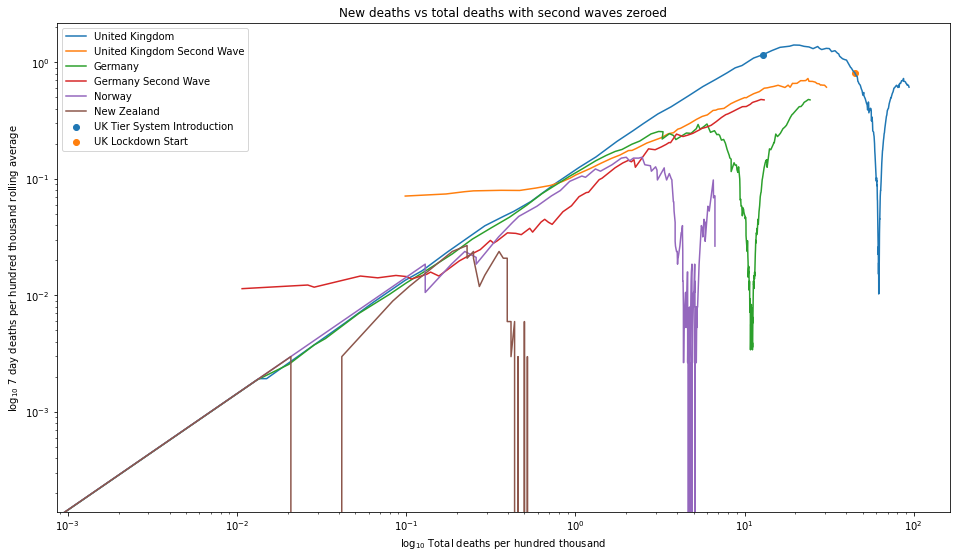

In [18]:
plt.rcParams["figure.figsize"] = (16,9)

plt.plot((np.divide(deaths["United Kingdom"].cumsum(axis=0).astype(str).astype(float).to_numpy(),668)),(np.divide(rolling_average["United Kingdom"].astype(str).astype(float).to_numpy(),668)))
plt.plot((np.divide(deaths["United Kingdom"].drop(deaths.index[:260-7]).cumsum(axis=0).astype(str).astype(float).to_numpy(),668)),(np.divide(rolling_average["United Kingdom"].drop(deaths.index[:260-7]).astype(str).astype(float).to_numpy(),668)))

plt.plot((np.divide(total_deaths["Germany"].astype(str).astype(float).to_numpy(),839)),(np.divide(rolling_average["Germany"].astype(str).astype(float).to_numpy(),839)))
plt.plot((np.divide(deaths["Germany"].drop(deaths.index[0:260-7]).cumsum(axis=0).astype(str).astype(float).to_numpy(),839)),(np.divide(rolling_average["Germany"].drop(deaths.index[0:260-7]).astype(str).astype(float).to_numpy(),839)))

plt.plot((np.divide(total_deaths["Norway"].astype(str).astype(float).to_numpy(),54)),(np.divide(rolling_average["Norway"].astype(str).astype(float).to_numpy(),54)))
plt.plot((np.divide(total_deaths["New Zealand"].astype(str).astype(float).to_numpy(),48)),(np.divide(rolling_average["New Zealand"].astype(str).astype(float).to_numpy(),48)))
plt.scatter((np.divide(deaths["United Kingdom"].cumsum(axis=0).astype(str).astype(float).to_numpy()[76],668)),(np.divide(rolling_average["United Kingdom"].astype(str).astype(float).to_numpy()[76],668)))
plt.scatter((np.divide(deaths["United Kingdom"].cumsum(axis=0).astype(str).astype(float).to_numpy()[76+28],668)),(np.divide(rolling_average["United Kingdom"].astype(str).astype(float).to_numpy()[76+28],668)))

china_dip=110

plt.xscale('log')
plt.yscale('log')
plt.xlabel("$\log_{10}$ Total deaths per hundred thousand")
plt.ylabel("$\log_{10}$ 7 day deaths per hundred thousand rolling average")
plt.title("New deaths vs total deaths with second waves zeroed")

plt.legend(["United Kingdom","United Kingdom Second Wave","Germany","Germany Second Wave","Norway","New Zealand","UK Tier System Introduction","UK Lockdown Start"])

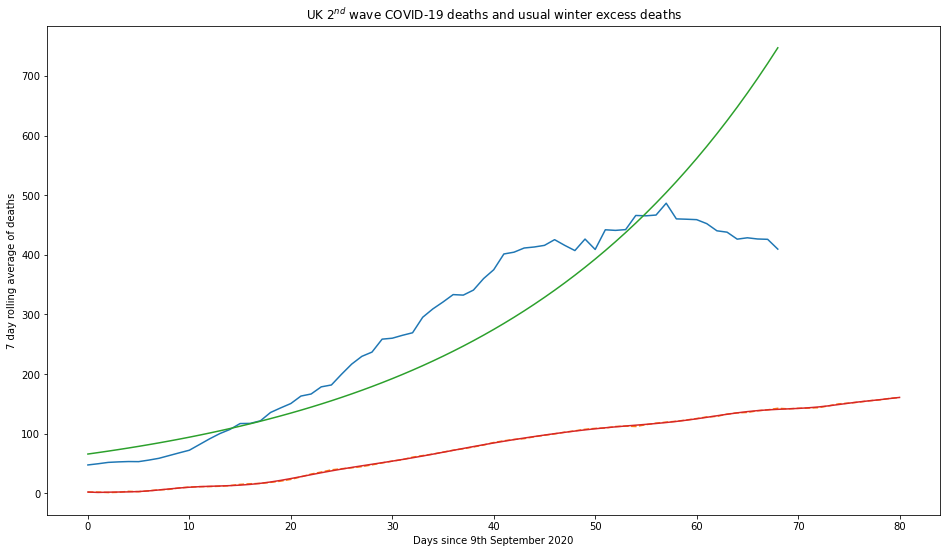

In [19]:
plt.rcParams["figure.figsize"] = (16,9)

plt.plot((np.divide(rolling_average["United Kingdom"].drop(deaths.index[0:260-7]).astype(str).astype(float).to_numpy(),1)))

china_dip=110

plt.plot((np.divide(winter_mortality["Excess"].astype(str).astype(float).to_numpy(),1)),linestyle = '--')

plt.xlabel("Days since 9th September 2020")
plt.ylabel("7 day rolling average of deaths")
plt.title("UK $2^{nd}$ wave COVID-19 deaths and usual winter excess deaths")


y=np.log10(rolling_average["United Kingdom"].drop(deaths.index[0:260-7]).astype(str).astype(float).to_numpy())
#y=rolling_average["United Kingdom"].drop(deaths.index[0:260-7]).astype(str).astype(float).to_numpy()
x=range(0,len(y))

model1 = np.polyfit(x,y,1, full=True)
#model1 = np.polyfit(x,y,3,full=False)
predict1 = np.poly1d(model1[0])
plt.plot(x,[pow(10,model1[0][1])*pow(10,model1[0][0]*n) for n in x])
#plt.plot(x,[predict1(n) for n in x],color="black")

y2=winter_mortality["Excess"].drop(winter_mortality.index[0:0]).astype(str).astype(float).to_numpy()
x2=range(0,len(y2))

model2 = np.polyfit(x2,y2,18,full=True)
predict=np.poly1d(model2[0])
#plt.yscale('log')
plt.plot(x2,[predict(n) for n in x2])
#plt.legend(["United Kingdom","5 year average of 'winter' mortality, derived from all cause mortality minus background mortality rate from rest of year","Exponential line from data fitting, R=%s"%round(model1[1][0],3),"Linear line from fit of winter data, R=%s"%round(model2[1][0],3),"UK Lockdown Start","UK Tier System Introduction","UK Average Winter Excess Mortality for this period"])#,"Italy","Italy Second Wave","France","France Second Wave"])"""

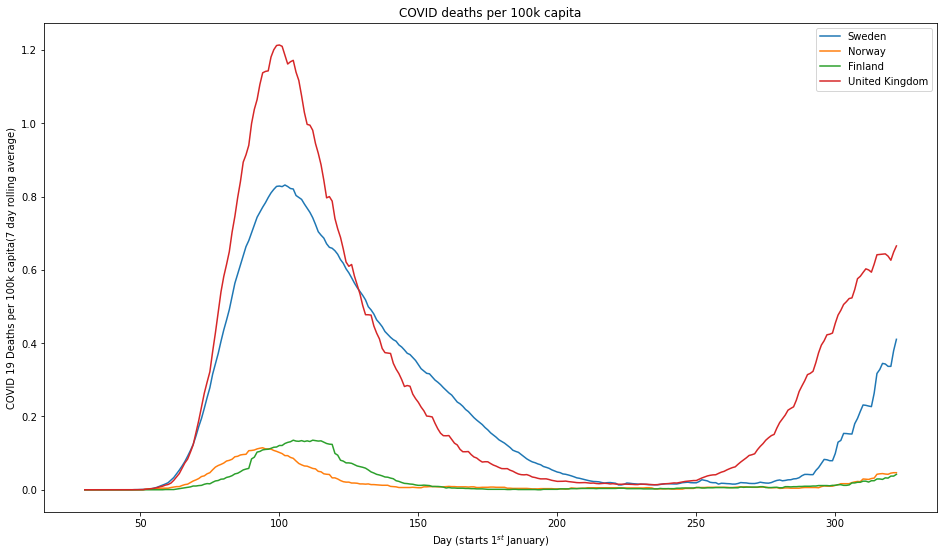

In [20]:
plt.plot(deaths["Sweden"].rolling(average_period).mean()/103.43403)
plt.plot(deaths["Norway"].rolling(average_period).mean()/54.39508)
plt.plot(deaths["Finland"].rolling(average_period).mean()/55.44394)
plt.plot(deaths["United Kingdom"].rolling(average_period).mean()/668)
"""plt.scatter(86,deaths["United Kingdom"].rolling(average_period).mean()[86])
plt.scatter(86+28,deaths["United Kingdom"].rolling(average_period).mean()[86+28])"""
plt.ylabel("COVID 19 Deaths per 100k capita(7 day rolling average)")
plt.xlabel("Day (starts $1^{st}$ January)")
plt.title("COVID deaths per 100k capita")
plt.legend(["Sweden","Norway","Finland","United Kingdom"])

Text(0.5, 1.0, 'UK COVID deaths with a log scaled y axis')

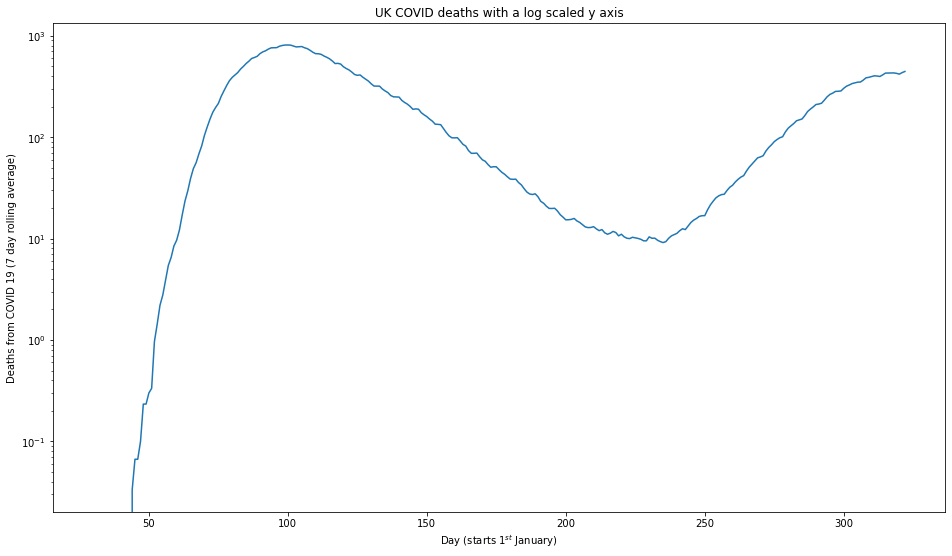

In [21]:
plt.plot(deaths["United Kingdom"].rolling(average_period).mean())
plt.yscale('log')
plt.ylabel("Deaths from COVID 19 (7 day rolling average)")
plt.xlabel("Day (starts $1^{st}$ January)")
plt.title("UK COVID deaths with a log scaled y axis")

NameError: name 'data' is not defined